In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#显示中文(根据自己电脑设置)
plt.rcParams['font.sans-serif'] = ['SimHei']
#显示负数
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = np.genfromtxt('data1.txt',delimiter=',')
print(data[:5])
x,y = data[:,:-1],data[:,-1]

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


In [4]:
#数据预处理

def preProcess(x,y):
    #标准化特征缩放
    x-=np.mean(x,axis = 0)
    x/=np.std(x,axis=0,ddof=1)
    #ddof eans Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
    
    #在x前加上一列1  方便代码中的矩阵操作
    x = np.c_[np.ones(len(x)),x]
    y = np.c_[y]
    #np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
    return x,y

x,y = preProcess(x,y)

In [5]:
#定义模型

def model(x, theta):
    z = np.dot(x,theta)
    return 1/(1+np.exp(-z))

In [6]:
#损失函数

def costFunc(h,y):
    m = len(y)
    J = 1.0/m*np.sum(-np.dot(y.T,np.log(h))-np.dot((1-y).T,np.log(1-h)))
    # J = (-1.0/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    return J

In [26]:
# 梯度下降

alpha = 0.01
iter_num = 20000

def graDesc(x,y,alpha,iter_num):
    m,n = x.shape

    #n行1列theta参数
    theta = np.zeros((n,1))
    #初始化代价值
    J_history = np.zeros(iter_num)

    #迭代更新
    for i in range(iter_num):
        h = model(x,theta)
        J_history[i] = costFunc(h,y)
        #梯度下降算法，更新θ
        deletaTheta = 1.0/m*np.dot(x.T,h-y)
        theta-=alpha*deletaTheta
    return J_history,theta

In [27]:
#跑起来

#调用函数
J_history,theta = graDesc(x,y,alpha,iter_num)
#得出预测值
h = model(x,theta)

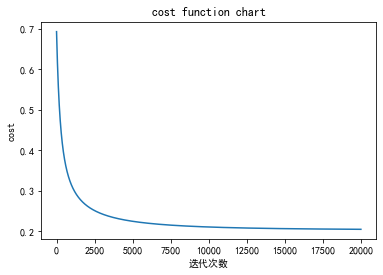

In [28]:
plt.title("cost function chart")
plt.plot(range(iter_num),J_history)
plt.xlabel('迭代次数')
plt.ylabel('cost')
plt.show()

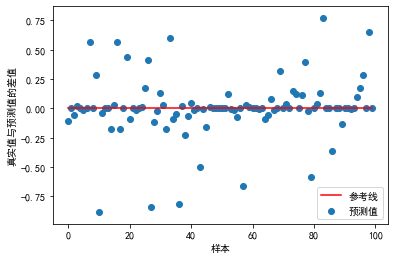

In [29]:
plt.scatter(range(len(y)),y-h,label='预测值')
plt.plot(range(len(y)),[0 for _ in range(len(y))],label='参考线',color='red')
plt.xlabel('样本')
plt.ylabel('真实值与预测值的差值')
plt.legend()
plt.show()

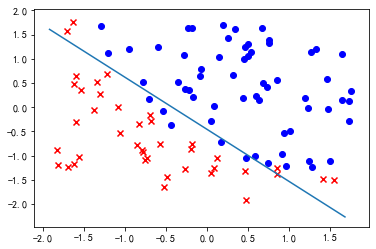

In [52]:
def plotDescisionBoundary(X,y,theta):
    # 补充画当前样本散点图的代码
# 分类决策面 theta0+theta1*x1+theta2*x2 = 0


    pos = np.where(y == 1)
    #pos是y中数据等于1的下标索引
    # print(pos)
    neg = np.where(y==0)
    #neg是y中数据等于0的下标索引
    # print(neg)


    x1 = np.arange(min(X[:, 1]), max(X[:, 1]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    #python中数据可视化函数scatter(数据的横坐标向量，数据的纵坐标向量，marker='0'数据以点的形式显示，c='b'数据点是blue颜色)
    plt.scatter(X[pos,0],X[pos, 1],marker='o', c='b')
    plt.scatter(X[neg,0],X[neg, 1],marker='x', c='r')
    plt.show()

plotDescisionBoundary(data[:,:-1],data[:,-1],theta)